In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import kneed
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [24]:
data = pd.read_excel('./scrapped/Final data for clustering.xlsx')
data.head()

,State,Population,Male-female ratio,# kids per person,percent infant mortality,Migrant population aged 5 and over,Specific rate of economic participation,# cities,GDP
0,Aguascalientes,1425607,95.576905,2.109342,6.155518,80357,63.304197,2022,157.304
1,Baja California,3769020,101.721123,1.903566,6.364128,269985,65.509672,5545,160.898
2,Baja California Sur,798447,103.390750,1.900622,5.947572,85835,67.045768,2543,201.759
3,Campeche,928363,96.927394,2.095864,6.509272,37557,63.341754,2762,525.822
4,Chiapas,5543828,95.350968,2.342042,7.455336,149762,61.188540,21157,46.146


In [25]:
features = data.columns[1:]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

In [26]:
kmeans_kwargs = {"init": "random",
"n_init": 10,
"max_iter": 300,
 "random_state": 42,}
 # A list holds the SSE values for each k
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

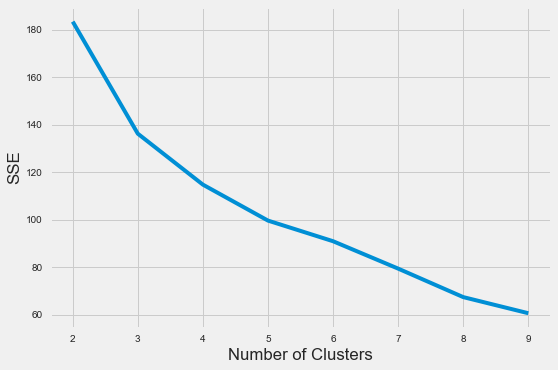

In [27]:
#%matplotlib inline
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), sse)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [28]:
kl = KneeLocator(range(2, 10), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [29]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [30]:
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
kmeans_silhouette

0.26

The silhouette score for K-means is 0.198


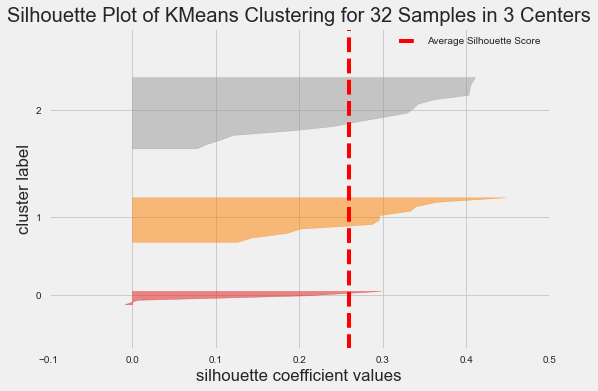

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 32 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
# Repeat, but now using k-means
kmeans_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl', KMeans(n_clusters=3))
])

kmeans_pipe.fit(data[features])
labels = kmeans_pipe.predict(data[features])

kmeans_sil_avg = silhouette_score(data[features], labels)
print('The silhouette score for K-means is %.3f' % kmeans_sil_avg)

# We can plot a silhouette plot for k-means using yellowbricks
visualizer = SilhouetteVisualizer(kmeans_pipe[1]) # Get the kmeans model
visualizer.fit(kmeans_pipe[0].transform(data[features])) # Pass the scaled data
visualizer.show() # show the plot

In [33]:
pca = PCA(n_components = 2)
pca.fit(scaled_features)

PCA(n_components=2)

In [34]:
PCA_df = pd.DataFrame(pca.transform(scaled_features))
PCA_df.columns = ['Component 1','Component 2']
PCA_df['cluster'] = labels
PCA_df['State'] = data['State']

c:\Users\u0132030\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


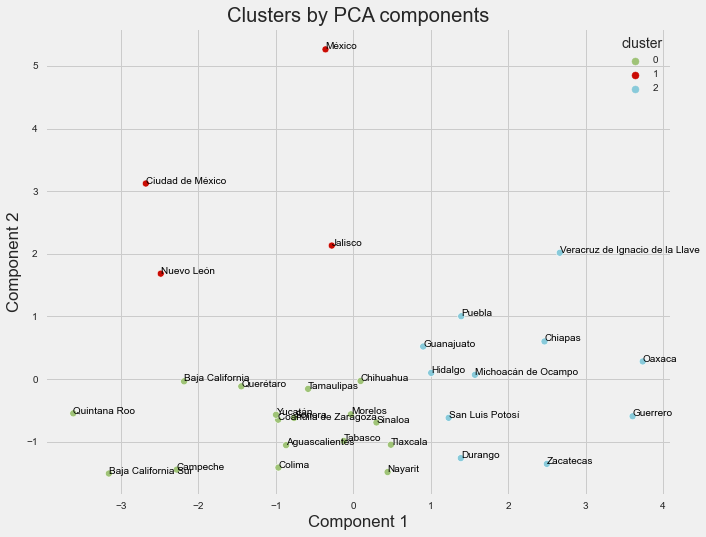

In [35]:
x_axis = PCA_df['Component 1']
y_axis = PCA_df['Component 2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = PCA_df['cluster'], palette = ['g','r','c'])
for i in range(PCA_df.shape[0]):
 plt.text(x=PCA_df['Component 1'][i],y=PCA_df['Component 2'][i],s=PCA_df['State'][i], 
          fontdict=dict(color='black',size=10))
plt.title('Clusters by PCA components')
plt.show()



In [36]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=features)
loading_matrix


,PC1,PC2
Population,0.099563,0.988000
Male-female ratio,-0.666587,-0.345115
# kids per person,0.908403,-0.319670
percent infant mortality,0.905955,-0.037512
Migrant population aged 5 and over,-0.202735,0.961974
Specific rate of economic participation,-0.780397,0.011801
# cities,0.583260,0.309846
GDP,-0.675764,-0.028812
